In [1]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import data
import matplotlib.dates as mdates
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm

from concurrent.futures import ThreadPoolExecutor
from data import *
from IPython.display import display
from itertools import product
from plotly.subplots import make_subplots


# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read & Process

## Read equities & cryptocurrencies data

In [3]:
print('*****Reading equity data*****')
df_equity = read_excel_sheets('data.xlsx')
display(df_equity.head())
list_equity = df_equity.Symbol.unique().tolist()

print('*****Reading cryptocurrency data*****')
df_crypto = read_excel_sheets('data_crypto.xlsx')
display(df_crypto.head())
list_crypto = df_crypto.Symbol.unique().tolist()

print('*****Concatenating both dfs*****')
df_full = pd.concat([df_equity, df_crypto])
display(df_full.sample(5))

print('*****Check for missing values*****\n', df_full.isna().sum())

*****Reading equity data*****
AAPL
MSFT
NVDA
AMZN
META
GOOGL
BRK.B
GOOG
AVGO
TSLA
SPY_ETF
DAXEX_ETF
CAC40_ETF
NKY225_ETF
DJIA_ETF
EQQQ_ETF
FTSE_ETF


,OpenTime,Open,High,Low,Close,Symbol
4371,2024-10-06 23:00:00,41070.0,41080.0,41000.0,41000.0,NKY225_ETF
4370,2024-10-06 23:05:00,41000.0,41060.0,40950.0,40980.0,NKY225_ETF
4369,2024-10-06 23:10:00,40960.0,40980.0,40930.0,40950.0,NKY225_ETF
4368,2024-10-06 23:15:00,40940.0,40990.0,40910.0,40930.0,NKY225_ETF
4367,2024-10-06 23:20:00,40940.0,40950.0,40890.0,40890.0,NKY225_ETF


*****Reading cryptocurrency data*****
Sheet1


,OpenTime,Open,High,Low,Close,Symbol
0,2024-10-04 16:00:00,0.35170,0.35220,0.35160,0.35210,ADAUSDT
1,2024-10-04 16:00:00,26.27000,26.32000,26.25000,26.32000,AVAXUSDT
2,2024-10-04 16:00:00,555.30000,556.40000,555.20000,556.30000,BNBUSDT
3,2024-10-04 16:00:00,62086.00000,62214.00000,62085.99000,62198.02000,BTCUSDT
4,2024-10-04 16:00:00,0.10924,0.10958,0.10923,0.10953,DOGEUSDT


*****Concatenating both dfs*****


,OpenTime,Open,High,Low,Close,Symbol
225491,2024-12-21 23:05:00,37.5700,37.5900,37.4900,37.5700,AVAXUSDT
21690,2024-10-12 04:45:00,0.3537,0.3546,0.3537,0.3542,ADAUSDT
4733,2024-10-18 15:50:00,432.7250,432.9700,432.7100,432.9700,DJIA_ETF
150826,2024-11-26 00:50:00,231.6600,232.6700,231.5400,231.8900,SOLUSDT
23196,2024-10-12 17:15:00,146.3000,146.3400,145.7500,145.7900,SOLUSDT


*****Check for missing values*****
 OpenTime    0
Open        0
High        0
Low         0
Close       0
Symbol      0
dtype: int64


# Pair Trading Example

## Prepare the pair trading series

In [4]:
seriesX = 'NVDA'
seriesY = 'BNBUSDT'

price_pairs1 = process_pairs_series(seriesX, seriesY, dfX=df_equity, dfY=df_crypto)
display(price_pairs1.head())

seriesX = 'DJIA_ETF'
seriesY = 'AVAXUSDT'

price_pairs2 = process_pairs_series(seriesX, seriesY, dfX=df_equity, dfY=df_crypto)
display(price_pairs2.head())

,NVDA,BNBUSDT
OpenTime,,
2024-10-14 12:30:00,137.98,588.6
2024-10-14 12:35:00,138.04,588.7
2024-10-14 12:40:00,137.60,589.0
2024-10-14 12:45:00,138.10,588.1
2024-10-14 12:50:00,138.64,588.0


,DJIA_ETF,AVAXUSDT
OpenTime,,
2024-10-14 12:30:00,427.88,29.17
2024-10-14 12:35:00,427.66,29.17
2024-10-14 12:40:00,427.92,29.20
2024-10-14 12:45:00,428.53,29.15
2024-10-14 12:50:00,428.00,29.17


## Test for Augmented Dickey-Fuller (ADF), Cointegration & Correlation

In [5]:
priceX = price_pairs1.iloc[:, 0]
priceY = price_pairs1.iloc[:, 1]

coint_stat, p_value, crit_values = coint(priceX, priceY)

# Print the results
print('Cointegration Test Results:')
print(f'Test Statistic: {coint_stat:.4f}')
print(f'P-Value: {p_value:.4f}')
print(f'Critical Values (1%, 5%, 10%): {crit_values}')

Cointegration Test Results:
Test Statistic: -3.2551
P-Value: 0.0612
Critical Values (1%, 5%, 10%): [-3.89861259 -3.33734163 -3.04529095]


Pair: NVDA & BNBUSDT
Correlation: -0.197

Spread ADF Statistic: -1.7645
p-value: 0.398 (Spread is non-stationary)

Cointegration Test Statistic: -3.2551
p-value: 0.061 (Both series are not cointegrated)
Failed to conduct stationarity test on NVDA and BNBUSDT: [Errno 2] No such file or directory: 'output/cointegration_test_NVDA_BNBUSDT.png'


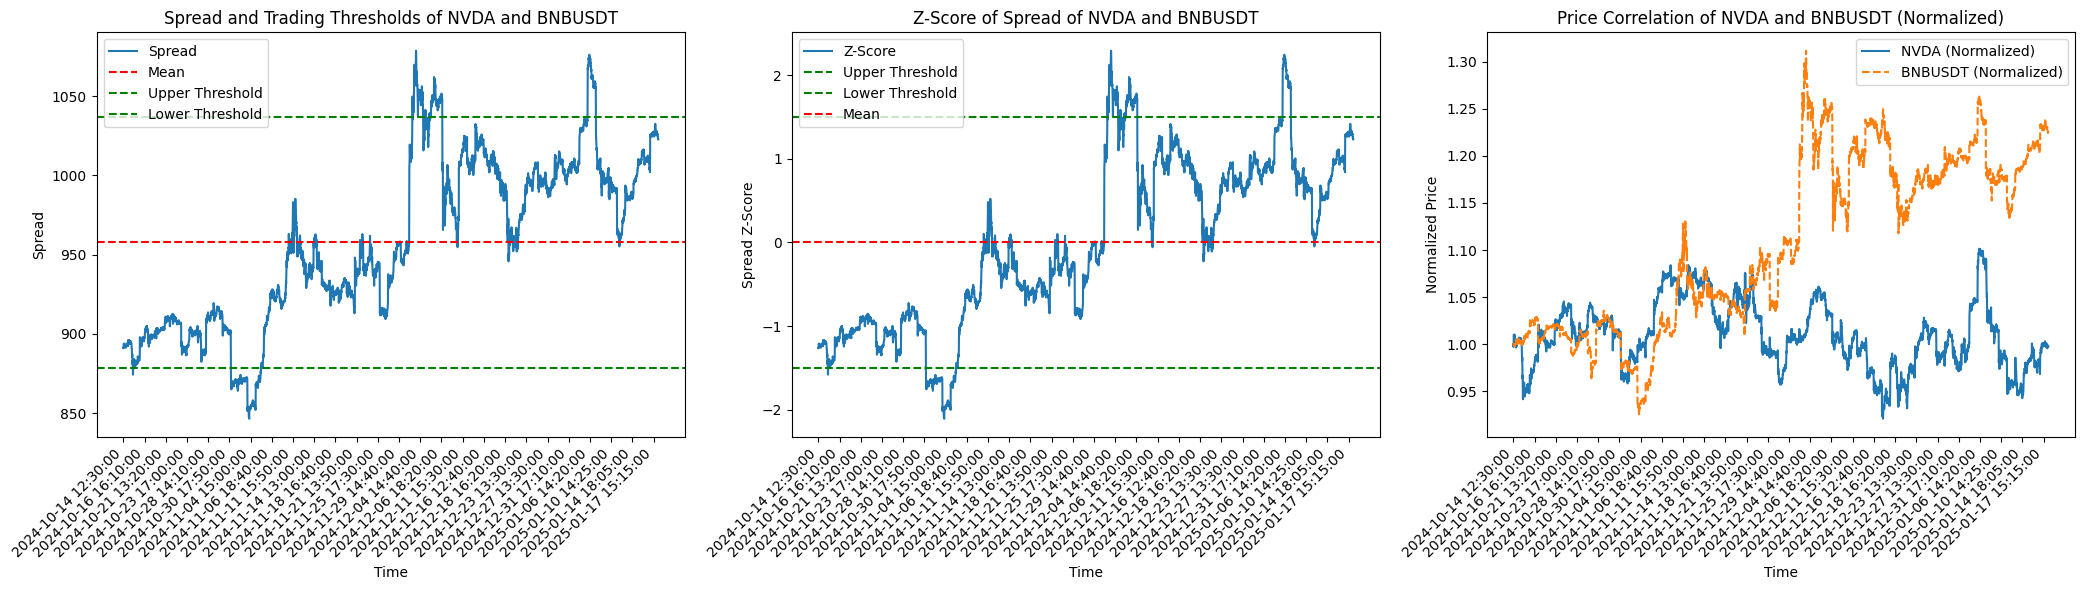

In [6]:
spread, correlation, adf_result, coint_result = run_cointegration_test(price_pairs1, print_stats=True, plotting=True, std=1.5)

Pair: NVDA & BNBUSDT
Correlation: -0.197

Spread ADF Statistic: -1.7645
p-value: 0.398 (Spread is non-stationary)

Cointegration Test Statistic: -3.2551
p-value: 0.061 (Both series are not cointegrated)
Failed to conduct stationarity test on NVDA and BNBUSDT: [Errno 2] No such file or directory: 'output/cointegration_test_NVDA_BNBUSDT.png'


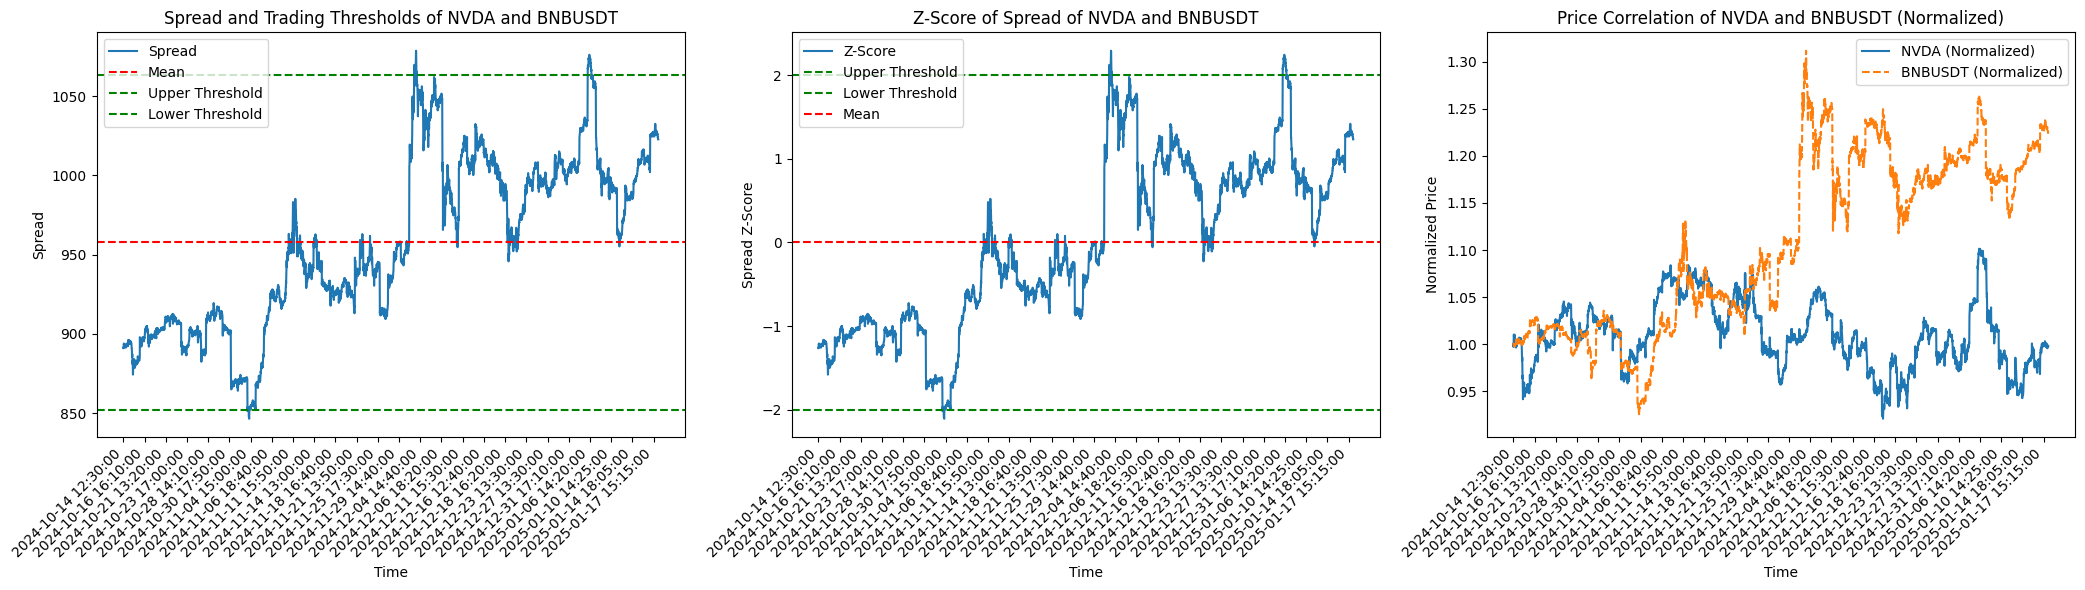

In [7]:
spread, correlation, adf_result, coint_result = run_cointegration_test(price_pairs1, print_stats=True, plotting=True, std=2)

Pair: DJIA_ETF & AVAXUSDT
Correlation: 0.672

Spread ADF Statistic: -1.8769
p-value: 0.343 (Spread is non-stationary)

Cointegration Test Statistic: -2.2746
p-value: 0.386 (Both series are not cointegrated)
Failed to conduct stationarity test on DJIA_ETF and AVAXUSDT: [Errno 2] No such file or directory: 'output/cointegration_test_DJIA_ETF_AVAXUSDT.png'


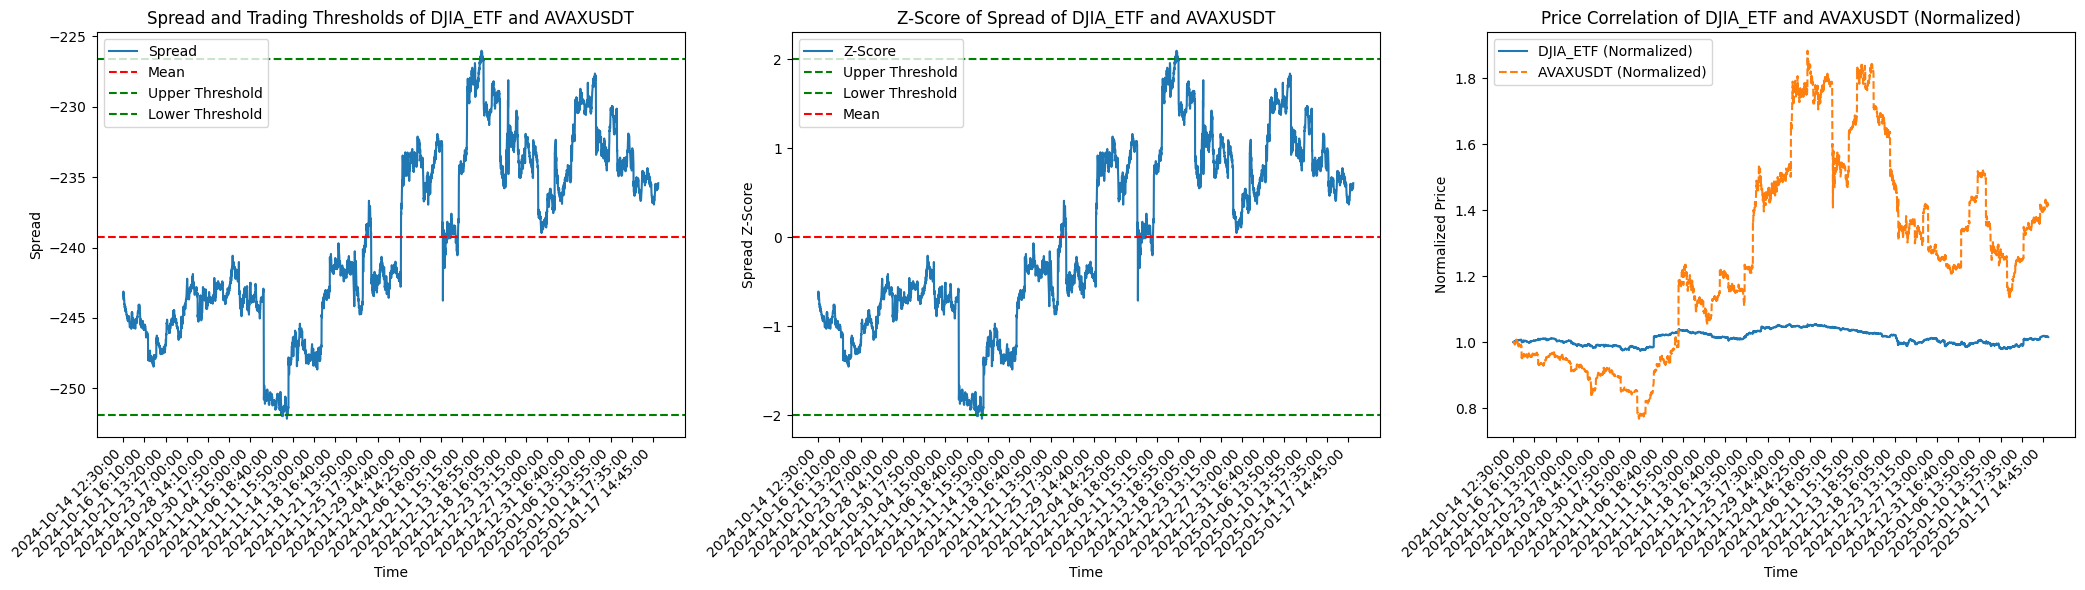

In [8]:
spread, correlation, adf_result, coint_result = run_cointegration_test(price_pairs2, print_stats=True, plotting=True, std=2)

In [9]:
spread, correlation, adf_result, coint_result

(None, None, None, None)

In [11]:
equity_pairs = [pair for pair in product(list_equity, list_equity)]
eq_cr_pairs = [pair for pair in product(list_equity, list_crypto)]
crypto_pairs = [pair for pair in product(list_crypto, list_crypto)]

all_pairs = equity_pairs + eq_cr_pairs + crypto_pairs
all_pairs[:5]

[('NKY225_ETF', 'NKY225_ETF'),
 ('NKY225_ETF', 'AAPL'),
 ('NKY225_ETF', 'AMZN'),
 ('NKY225_ETF', 'AVGO'),
 ('NKY225_ETF', 'BRK.B')]

## Parallelized Pair Processing

In [13]:
from concurrent.futures import ThreadPoolExecutor, as_completed

def process_single_pair(pair):
    ticker1, ticker2 = pair
    if ticker1 == ticker2:
        return None
        
    # Prepare for pair prices
    price_pairs = process_pairs_series(ticker1, ticker2, df=df_full)
    if price_pairs.empty:
        print(f'Pair {ticker1} and {ticker2} has no common trading hours.')
        return None
    else:
        spread, correlation, adf_result, coint_result = run_cointegration_test(price_pairs, print_stats=False, plotting=False)
        
        # Unpack adf result
        adf_stat, adf_pv, _, num_observations, *_ = adf_result
        # Check for Spread stationarity
        spread_stationary = adf_pv <= 0.05
        # Unpack cointegration result
        coint_stat, coint_pv, crit_values = coint_result
        # Check for Series cointegration
        series_coint = coint_pv <= 0.05
        
        return {
            'seriesX': ticker1,
            'seriesY': ticker2,
            'correlation': correlation,
            'spread_adf_stat': adf_stat,
            'spread_adf_pValue': adf_pv,
            'spread_stationary': spread_stationary,
            'series_coint_stat': coint_stat,
            'series_coint_pValue': coint_pv,
            'series_cointegrated': series_coint
        }

list_results = []

with ThreadPoolExecutor(max_workers=10) as executor:
    # Submit all pairs for processing
    future_to_pair = {executor.submit(process_single_pair, pair): pair for pair in all_pairs}
    
    # Collect results as they complete
    for future in as_completed(future_to_pair):
        result = future.result()
        if result is not None:
            list_results.append(result)

print(f'Number of potential trading pairs: {len(list_results)}')

Pair NKY225_ETF and BRK.B has no common trading hours.
Pair NKY225_ETF and AMZN has no common trading hours.
Pair NKY225_ETF and AVGO has no common trading hours.
Pair NKY225_ETF and AAPL has no common trading hours.
Pair NKY225_ETF and GOOG has no common trading hours.
Pair NKY225_ETF and META has no common trading hours.
Pair NKY225_ETF and DJIA_ETF has no common trading hours.
Pair NKY225_ETF and GOOGL has no common trading hours.
Pair NKY225_ETF and MSFT has no common trading hours.
Pair NKY225_ETF and NVDA has no common trading hours.
Pair NKY225_ETF and SPY_ETF has no common trading hours.
Pair NKY225_ETF and DAXEX_ETF has no common trading hours.
Pair NKY225_ETF and CAC40_ETF has no common trading hours.
Pair NKY225_ETF and EQQQ_ETF has no common trading hours.
Pair NKY225_ETF and TSLA has no common trading hours.
Pair NKY225_ETF and FTSE_ETF has no common trading hours.
Pair AAPL and NKY225_ETF has no common trading hours.
Pair AMZN and NKY225_ETF has no common trading hours.
P

## Pair Analysis Results

In [14]:
df_results = pd.DataFrame(list_results)
display(df_results.sample(5))

,seriesX,seriesY,correlation,spread_adf_stat,spread_adf_pValue,spread_stationary,series_coint_stat,series_coint_pValue,series_cointegrated
173,TSLA,MSFT,0.576592,-2.544646,0.104986,False,-1.670365,0.690299,False
447,BTCUSDT,TRXUSDT,0.822284,-2.408388,0.139383,False,-2.179575,0.434920,False
167,TSLA,AVGO,0.692854,-1.500628,0.533200,False,-2.099439,0.476660,False
174,TSLA,DAXEX_ETF,0.769522,-1.269022,0.643223,False,-1.946101,0.556456,False
309,GOOG,XRPUSDT,0.752273,-1.417410,0.573902,False,-1.907855,0.576017,False


In [15]:
df_results.spread_stationary.value_counts(), df_results.series_cointegrated.value_counts()

(spread_stationary
 False    427
 True      73
 Name: count, dtype: int64,
 series_cointegrated
 False    469
 True      31
 Name: count, dtype: int64)

In [16]:
# df_results.to_csv('spread_analysis.csv', index=False)

## Visualizing Correlations

seriesX,AAPL,ADAUSDT,AMZN,AVAXUSDT,AVGO,BNBUSDT,BRK.B,BTCUSDT,CAC40_ETF,DAXEX_ETF,...,META,MSFT,NKY225_ETF,NVDA,SOLUSDT,SPY_ETF,TRXUSDT,TSLA,USDCUSDT,XRPUSDT
seriesX,,,,,,,,,,,,,,,,,,,,,
AAPL,1.00,0.41,0.92,0.40,0.87,0.61,-0.42,0.34,-0.63,0.91,...,0.93,0.87,0.94,-0.75,0.39,0.40,0.64,0.91,0.82,0.64
ADAUSDT,0.41,1.00,0.95,0.99,-0.08,0.97,0.71,0.99,-0.30,0.52,...,0.74,0.86,0.19,0.50,0.97,0.97,0.96,0.96,0.28,0.95
AMZN,0.92,0.95,1.00,0.94,0.80,0.99,-0.20,0.93,-0.61,0.87,...,0.92,0.89,0.44,-0.52,0.92,0.59,0.99,0.99,0.74,0.99
AVAXUSDT,0.40,0.99,0.94,1.00,-0.09,0.96,0.73,0.99,-0.31,0.50,...,0.73,0.88,0.18,0.52,0.97,0.98,0.95,0.95,0.04,0.94
AVGO,0.87,-0.08,0.80,-0.09,1.00,0.09,-0.78,-0.15,-0.61,0.86,...,0.85,0.67,0.77,-0.86,-0.32,0.08,0.15,0.79,0.93,0.18
BNBUSDT,0.61,0.97,0.99,0.96,0.09,1.00,0.57,0.94,-0.41,0.71,...,0.89,0.93,0.38,0.30,0.92,0.91,1.00,0.98,0.78,0.99
BRK.B,-0.42,0.71,-0.20,0.73,-0.78,0.57,1.00,0.75,0.35,-0.45,...,-0.36,-0.05,-0.46,0.80,0.94,0.56,0.54,-0.20,-0.98,0.52
BTCUSDT,0.34,0.99,0.93,0.99,-0.15,0.94,0.75,1.00,-0.25,0.46,...,0.69,0.82,0.13,0.54,0.98,0.97,0.94,0.95,-0.13,0.92
CAC40_ETF,-0.63,-0.30,-0.61,-0.31,-0.61,-0.41,0.35,-0.25,1.00,-0.54,...,-0.49,-0.44,-0.31,0.35,-0.55,-0.15,-0.38,-0.68,-0.03,-0.48


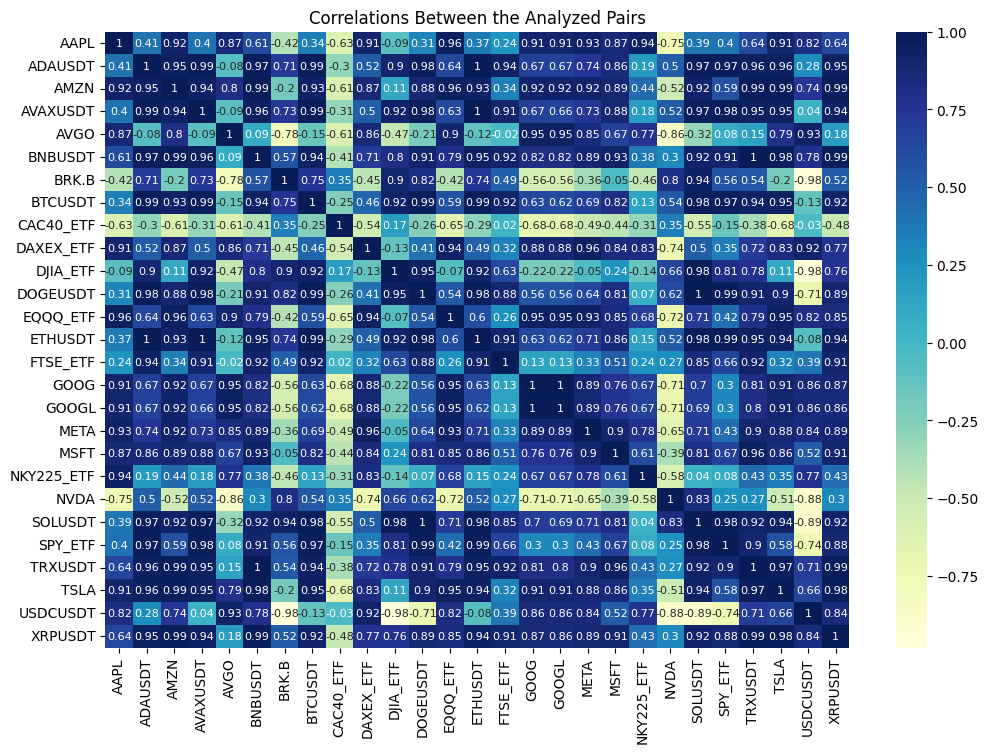

In [17]:
# Extract the pairwise correlations
df_temp = df_results[['seriesX', 'seriesY', 'correlation']].copy()
df_temp = df_temp.pivot(index=['seriesX'], columns=['seriesY'], values=['correlation']).T
df_corr = df_temp.corr().round(2)
display(df_corr)

# Plot the correlations
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_corr, cmap='YlGnBu', annot=True, annot_kws={'size': 8})
plt.title('Correlations Between the Analyzed Pairs')
plt.xlabel('')
plt.ylabel('')
plt.show();

## Finding the Pairs of Interest

*****Stationary spread, cointegration and correlation >= 0.8*****


,seriesX,seriesY,correlation,spread_adf_stat,spread_adf_pValue,spread_stationary,series_coint_stat,series_coint_pValue,series_cointegrated
79,GOOG,GOOGL,0.999931,-4.971937,0.000025,True,-4.976339,0.000182,True
113,META,DAXEX_ETF,0.888934,-2.917056,0.043400,True,-3.483091,0.033924,True
262,AMZN,BNBUSDT,0.877059,-3.631203,0.005192,True,-3.545100,0.028601,True
268,AMZN,TRXUSDT,0.814577,-3.869803,0.002269,True,-3.387413,0.043768,True
351,SPY_ETF,AVAXUSDT,0.847292,-3.309927,0.014441,True,-3.698512,0.018406,True
355,SPY_ETF,ETHUSDT,0.862483,-3.428205,0.010034,True,-3.737367,0.016394,True
391,EQQQ_ETF,BNBUSDT,0.886060,-3.816404,0.002744,True,-3.670509,0.019987,True
428,BNBUSDT,ADAUSDT,0.901459,-3.279504,0.015820,True,-3.775562,0.014607,True
430,BNBUSDT,BTCUSDT,0.884604,-2.909961,0.044202,True,-3.393160,0.043116,True
436,BNBUSDT,XRPUSDT,0.919004,-3.380878,0.011628,True,-4.054516,0.005995,True


Number of pairs: 11
Pair: GOOG & GOOGL
Correlation: 1.000

Spread ADF Statistic: -4.9719
p-value: 0.000 (Spread is stationary)

Cointegration Test Statistic: -4.9763
p-value: 0.000 (Both series are cointegrated)


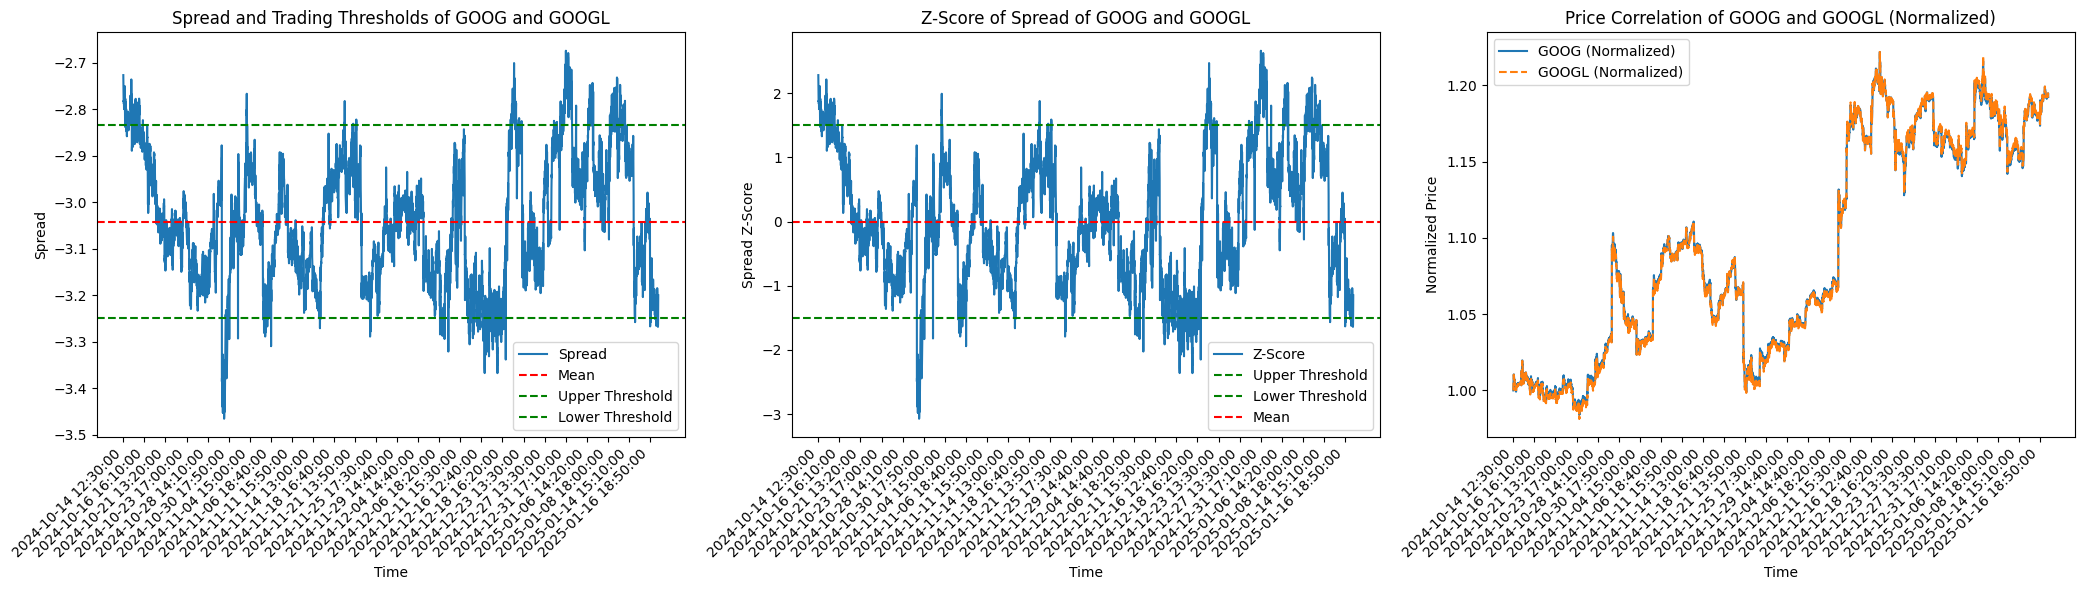

Pair: META & DAXEX_ETF
Correlation: 0.889

Spread ADF Statistic: -2.9171
p-value: 0.043 (Spread is stationary)

Cointegration Test Statistic: -3.4831
p-value: 0.034 (Both series are cointegrated)


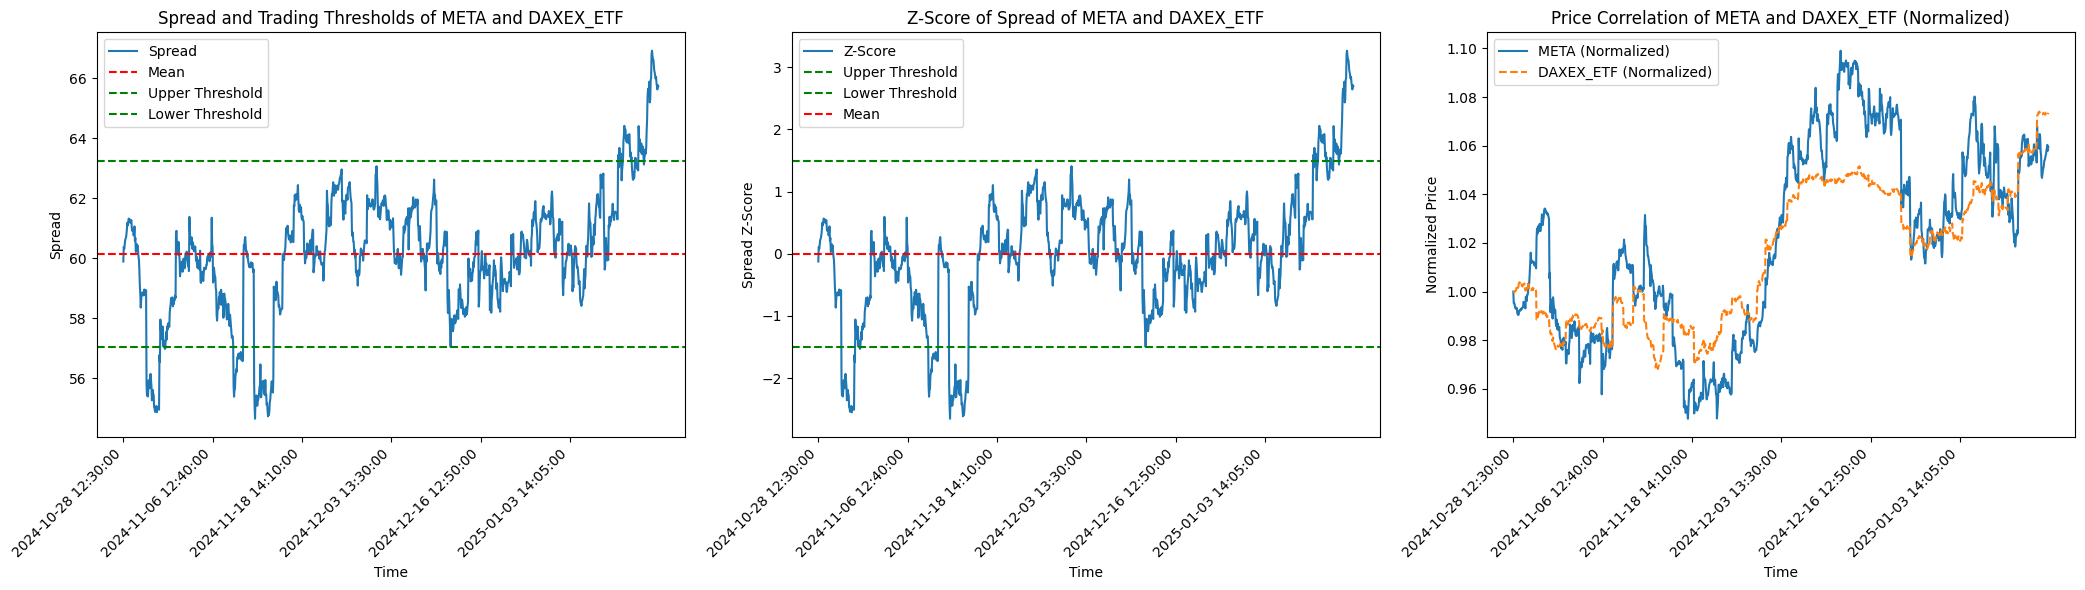

Pair: AMZN & BNBUSDT
Correlation: 0.877

Spread ADF Statistic: -3.6312
p-value: 0.005 (Spread is stationary)

Cointegration Test Statistic: -3.5451
p-value: 0.029 (Both series are cointegrated)


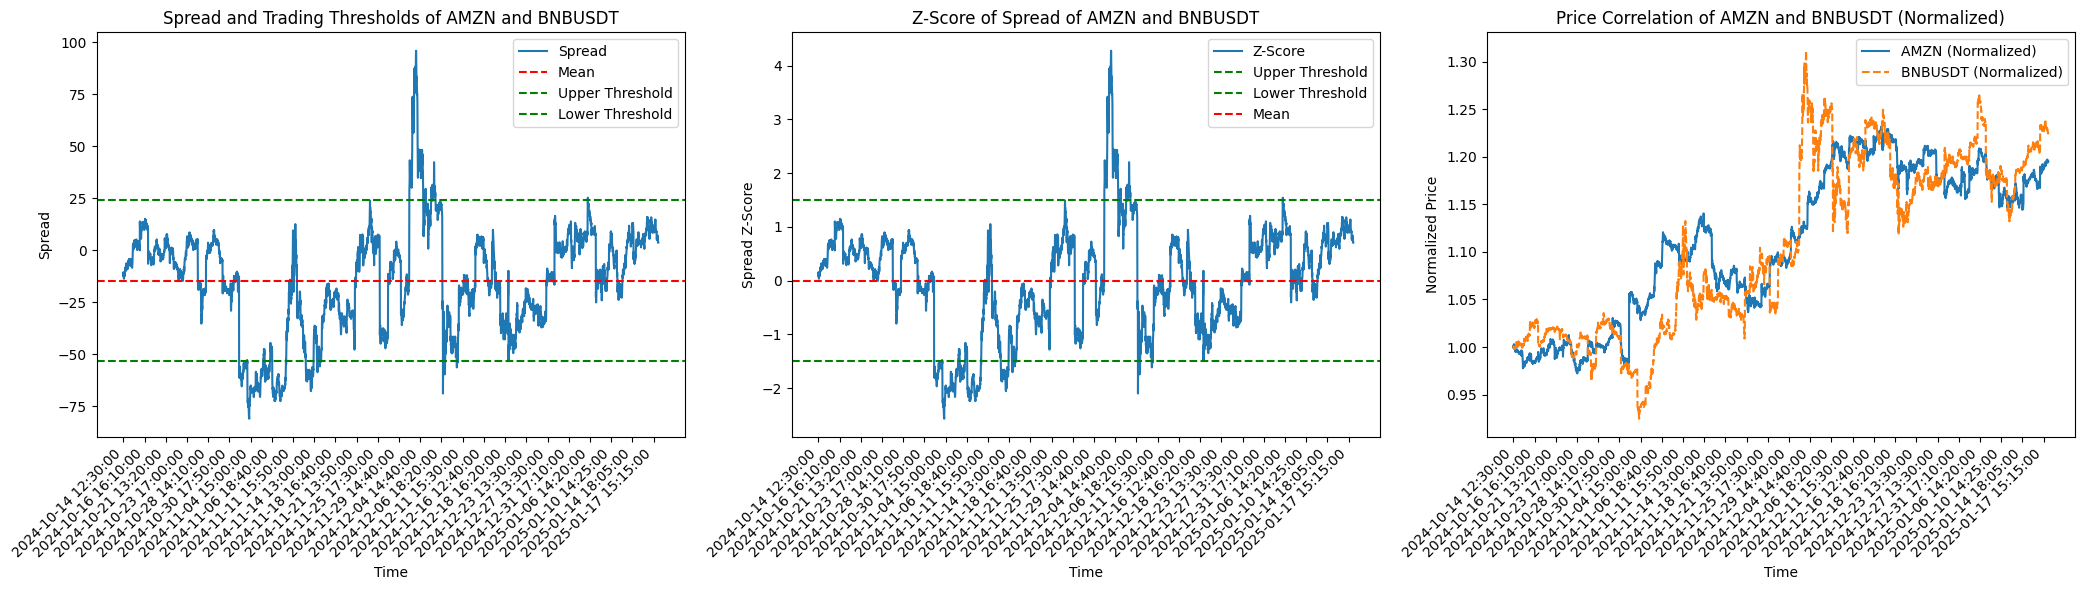

Pair: AMZN & TRXUSDT
Correlation: 0.815

Spread ADF Statistic: -3.8698
p-value: 0.002 (Spread is stationary)

Cointegration Test Statistic: -3.3874
p-value: 0.044 (Both series are cointegrated)


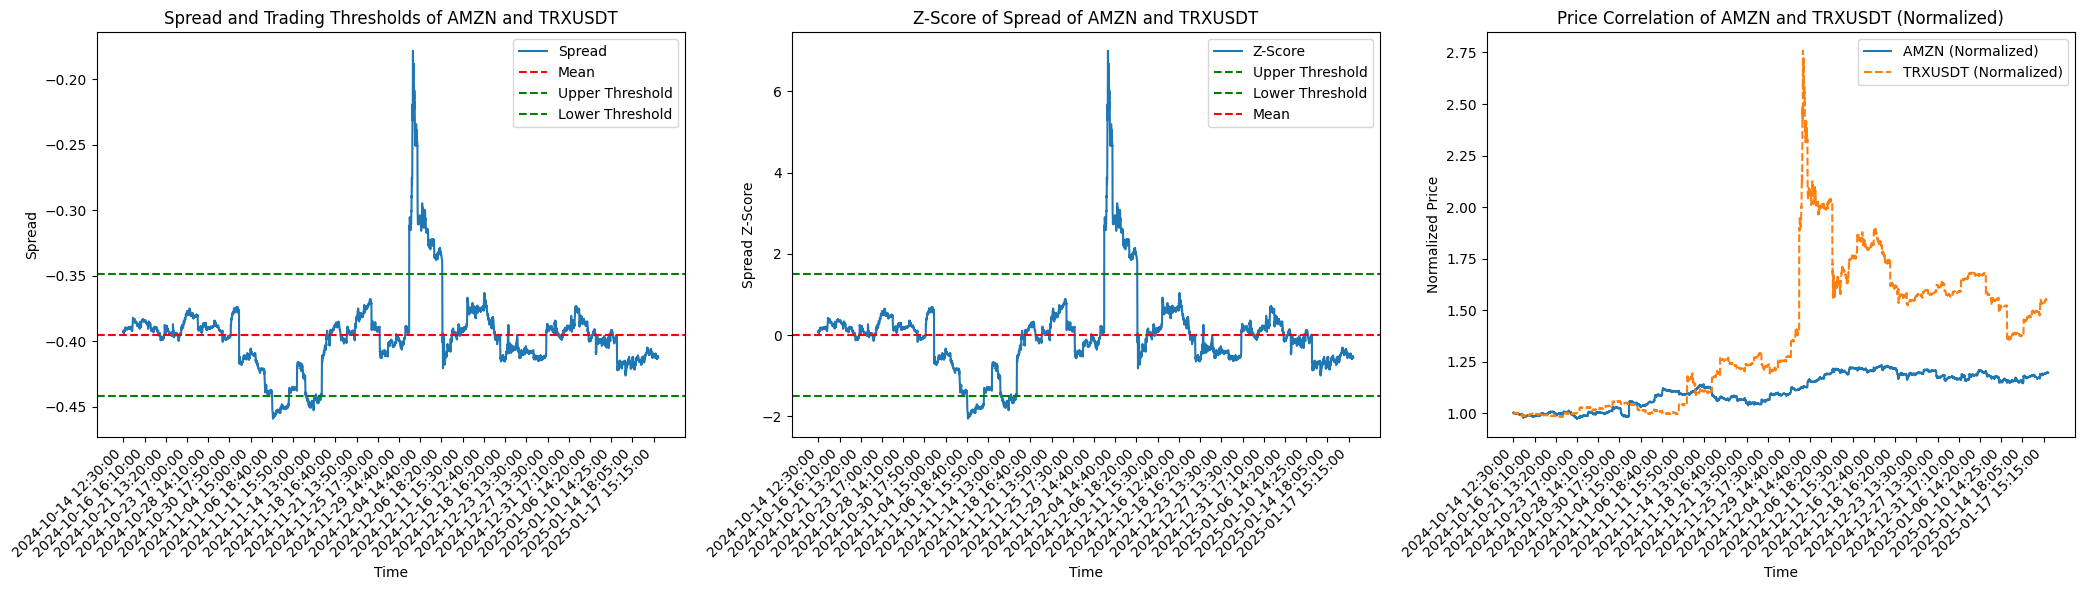

Pair: SPY_ETF & AVAXUSDT
Correlation: 0.847

Spread ADF Statistic: -3.3099
p-value: 0.014 (Spread is stationary)

Cointegration Test Statistic: -3.6985
p-value: 0.018 (Both series are cointegrated)


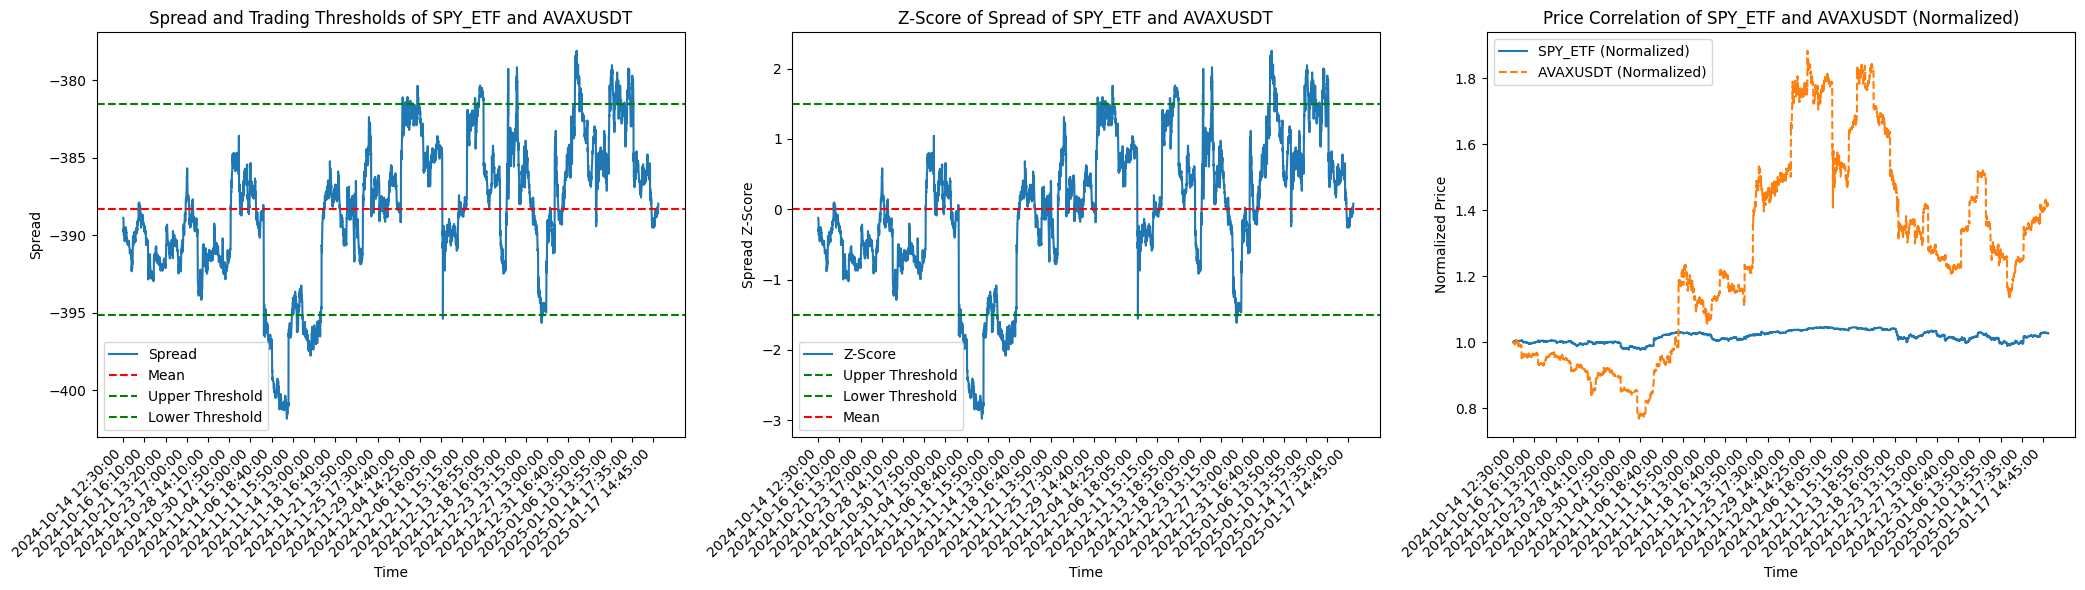

Pair: SPY_ETF & ETHUSDT
Correlation: 0.862

Spread ADF Statistic: -3.4282
p-value: 0.010 (Spread is stationary)

Cointegration Test Statistic: -3.7374
p-value: 0.016 (Both series are cointegrated)


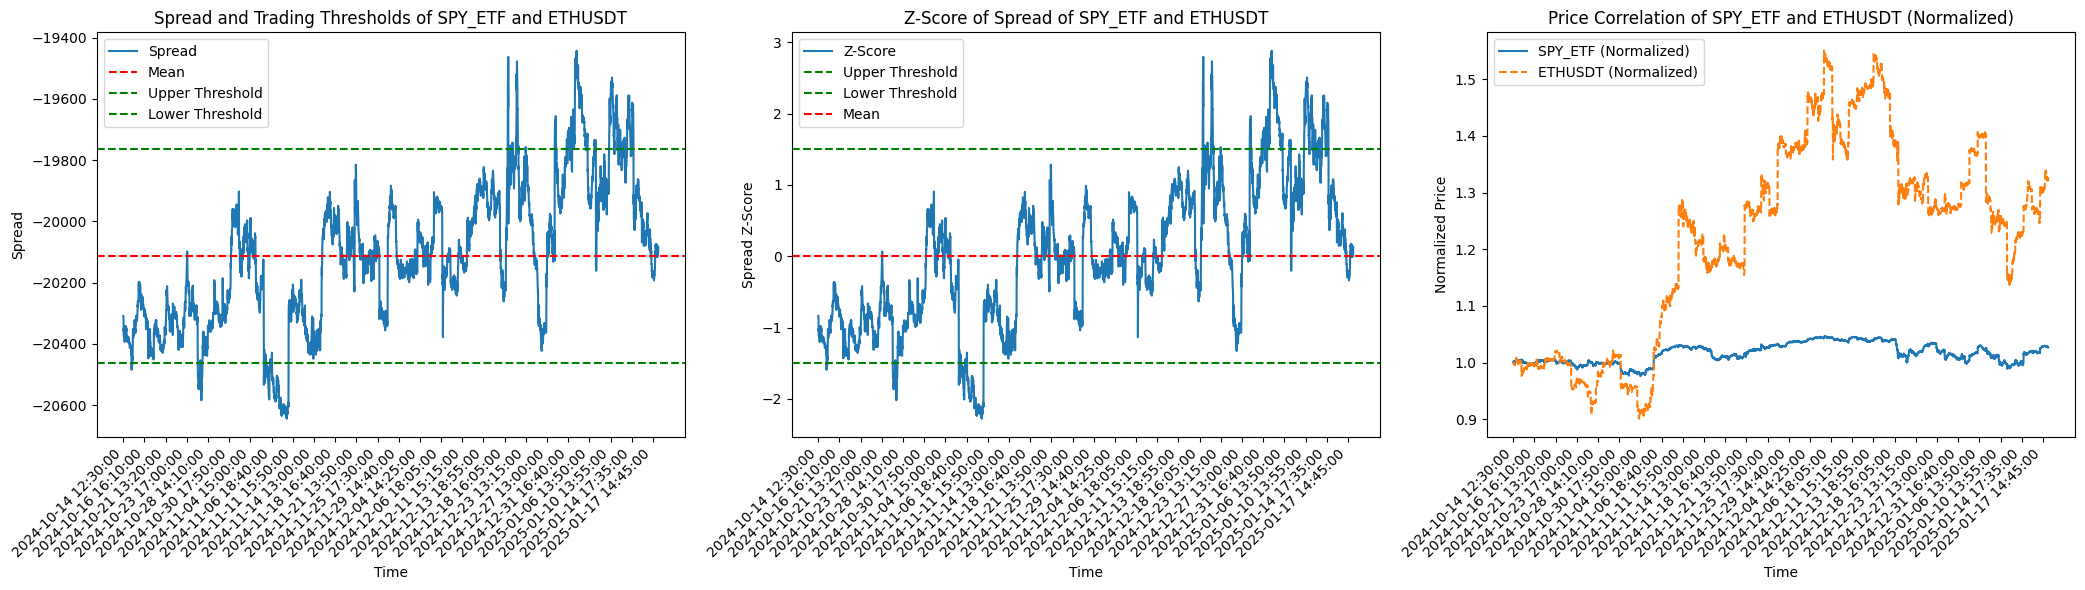

Pair: EQQQ_ETF & BNBUSDT
Correlation: 0.886

Spread ADF Statistic: -3.8164
p-value: 0.003 (Spread is stationary)

Cointegration Test Statistic: -3.6705
p-value: 0.020 (Both series are cointegrated)


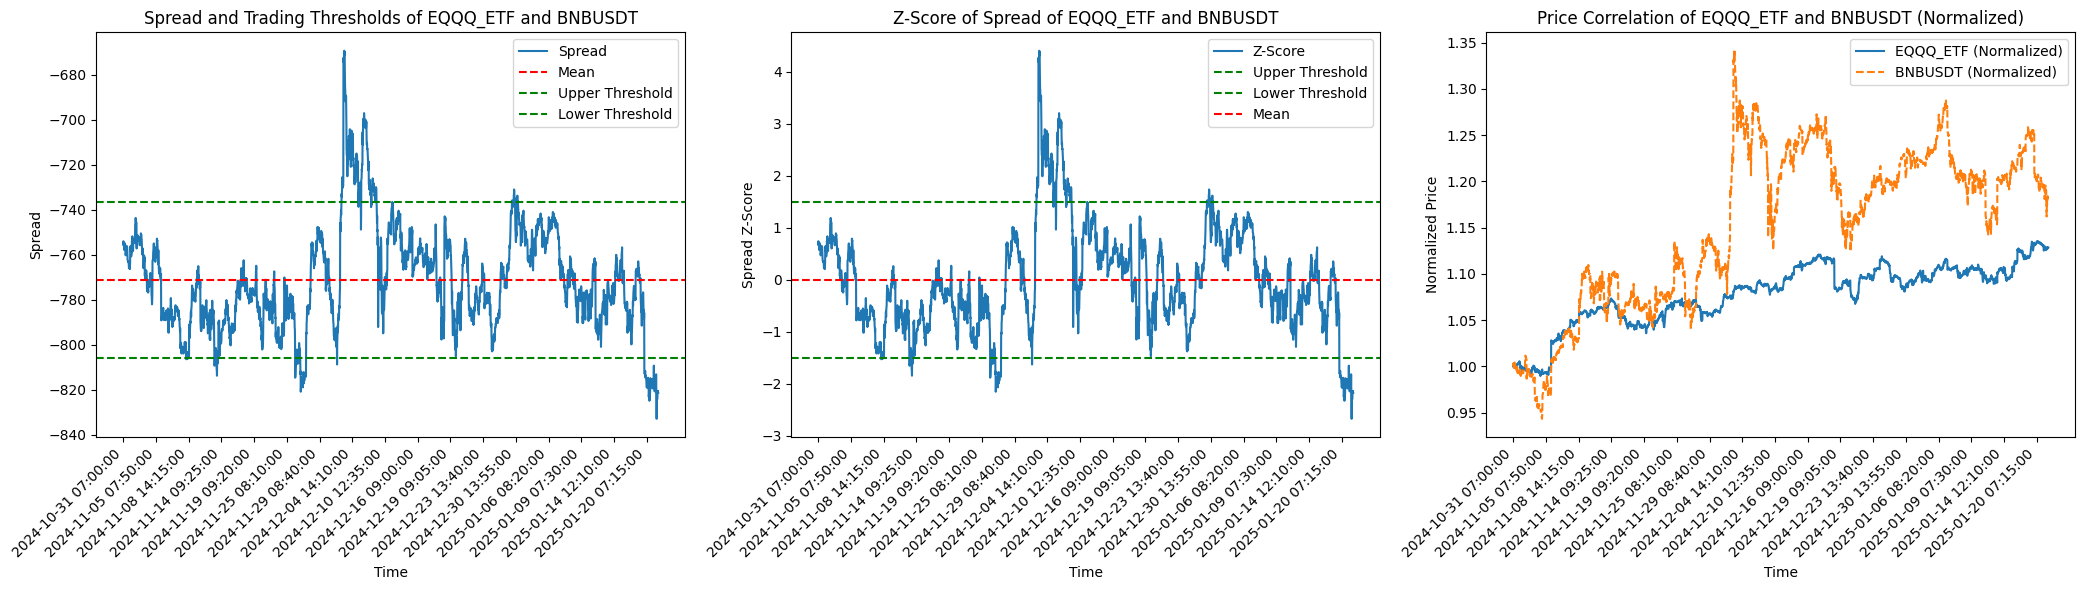

Pair: BNBUSDT & ADAUSDT
Correlation: 0.901

Spread ADF Statistic: -3.2795
p-value: 0.016 (Spread is stationary)

Cointegration Test Statistic: -3.7756
p-value: 0.015 (Both series are cointegrated)


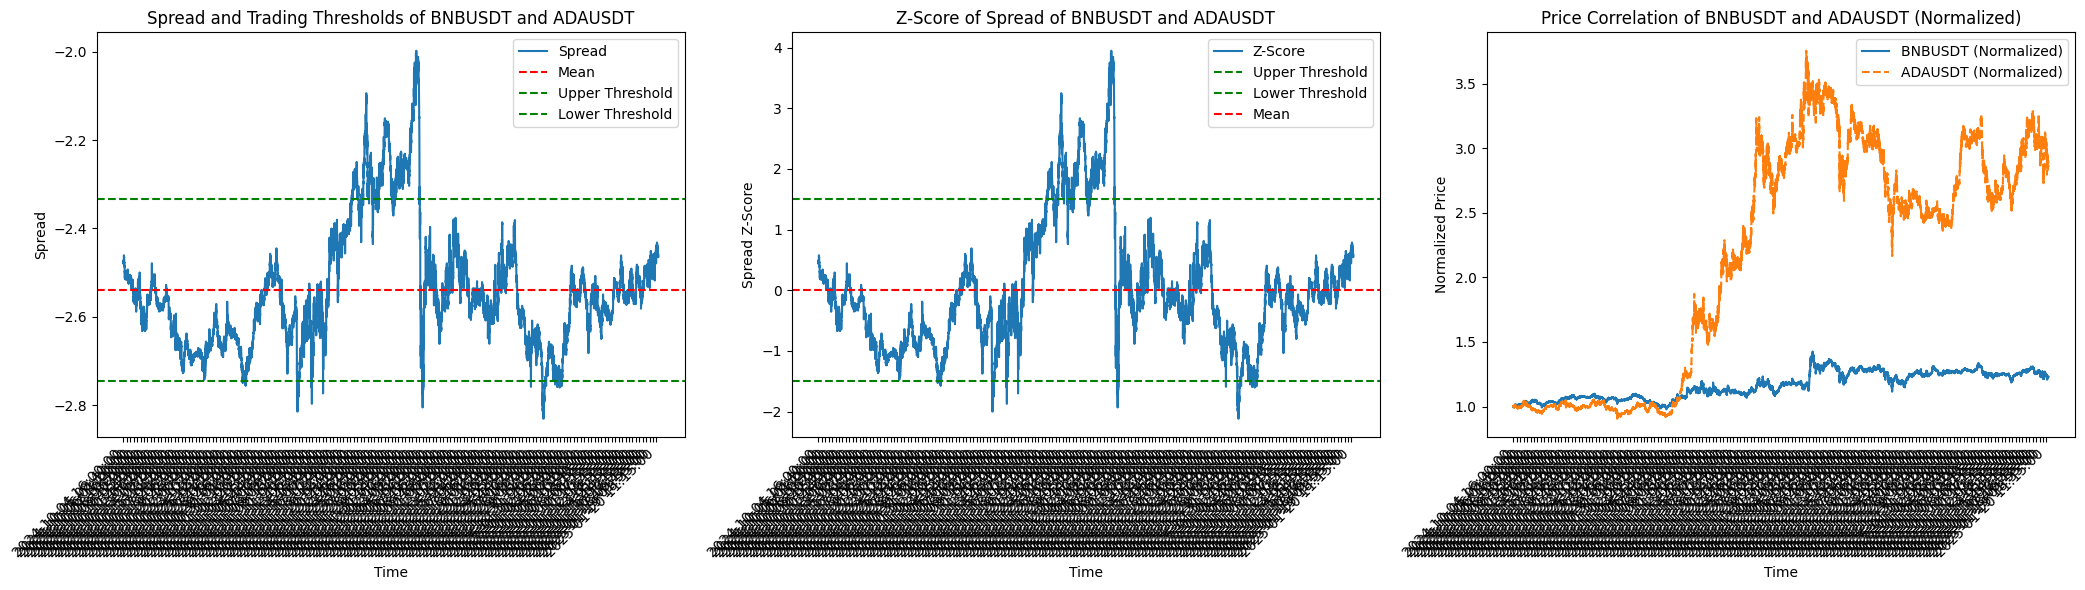

Pair: BNBUSDT & BTCUSDT
Correlation: 0.885

Spread ADF Statistic: -2.9100
p-value: 0.044 (Spread is stationary)

Cointegration Test Statistic: -3.3932
p-value: 0.043 (Both series are cointegrated)


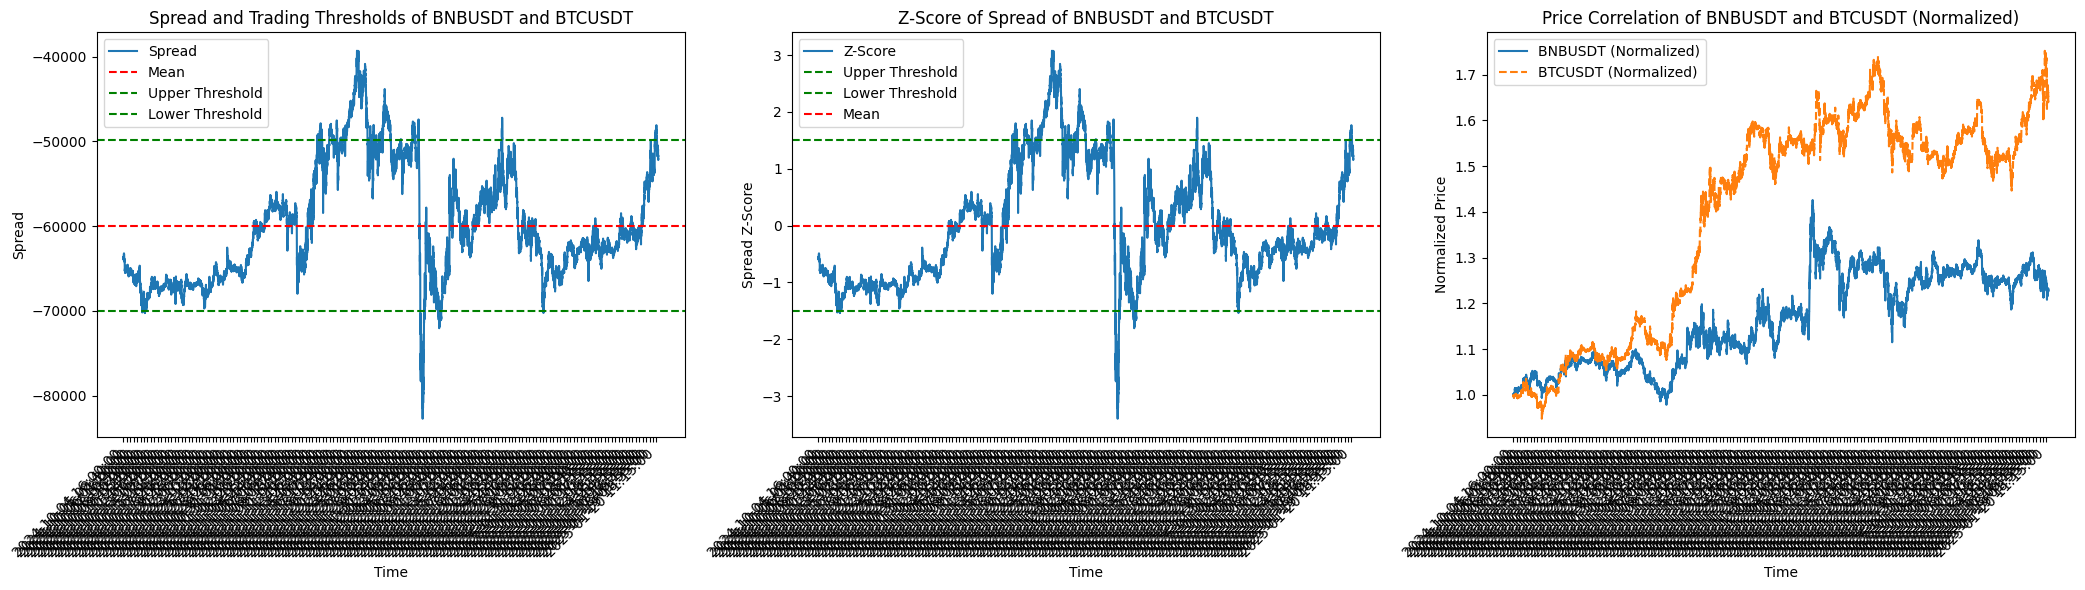

Pair: BNBUSDT & XRPUSDT
Correlation: 0.919

Spread ADF Statistic: -3.3809
p-value: 0.012 (Spread is stationary)

Cointegration Test Statistic: -4.0545
p-value: 0.006 (Both series are cointegrated)


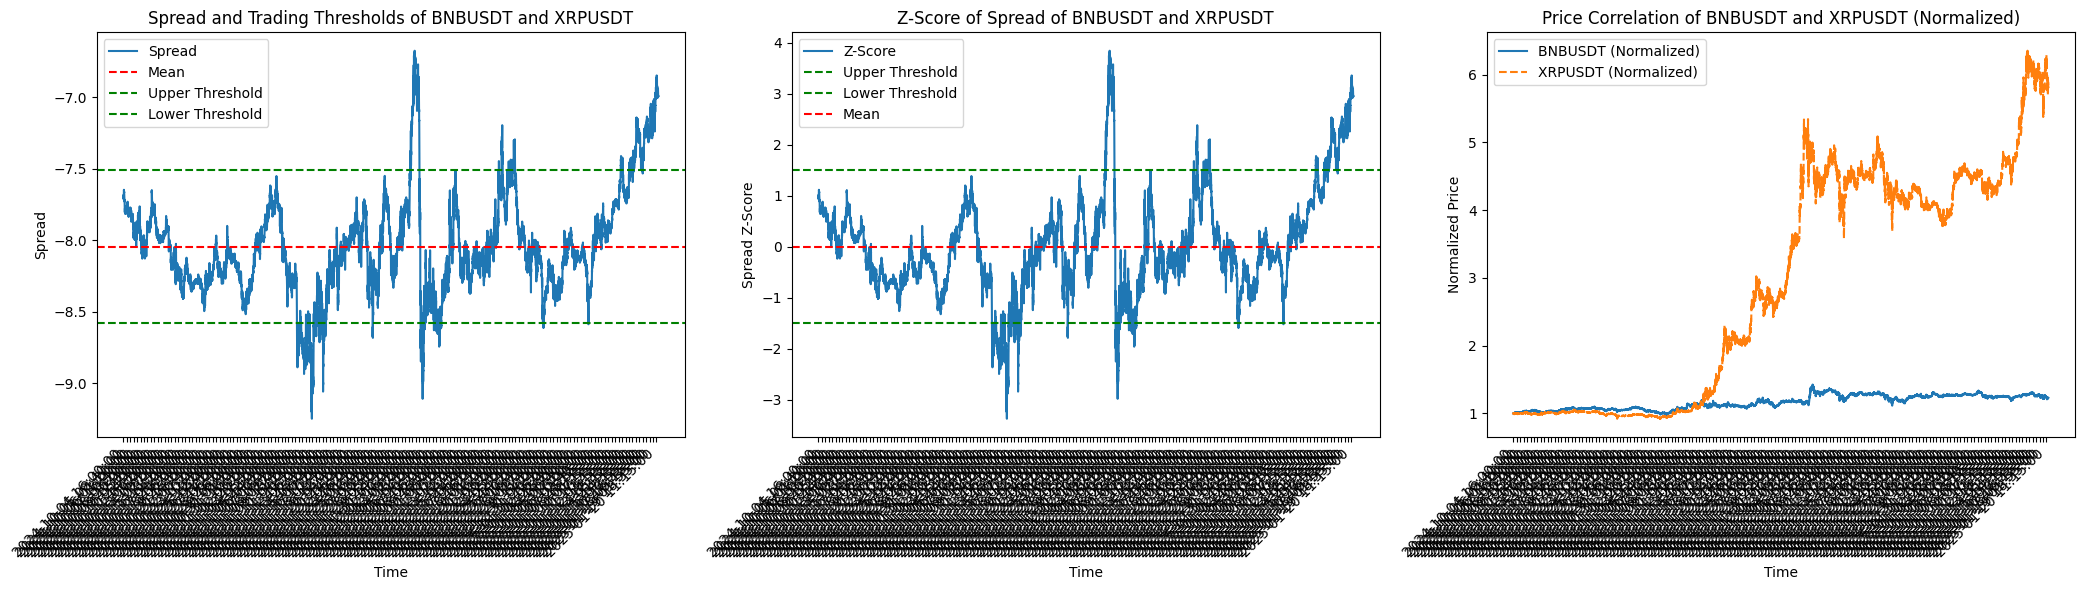

Pair: BNBUSDT & TRXUSDT
Correlation: 0.934

Spread ADF Statistic: -3.6564
p-value: 0.005 (Spread is stationary)

Cointegration Test Statistic: -4.0037
p-value: 0.007 (Both series are cointegrated)


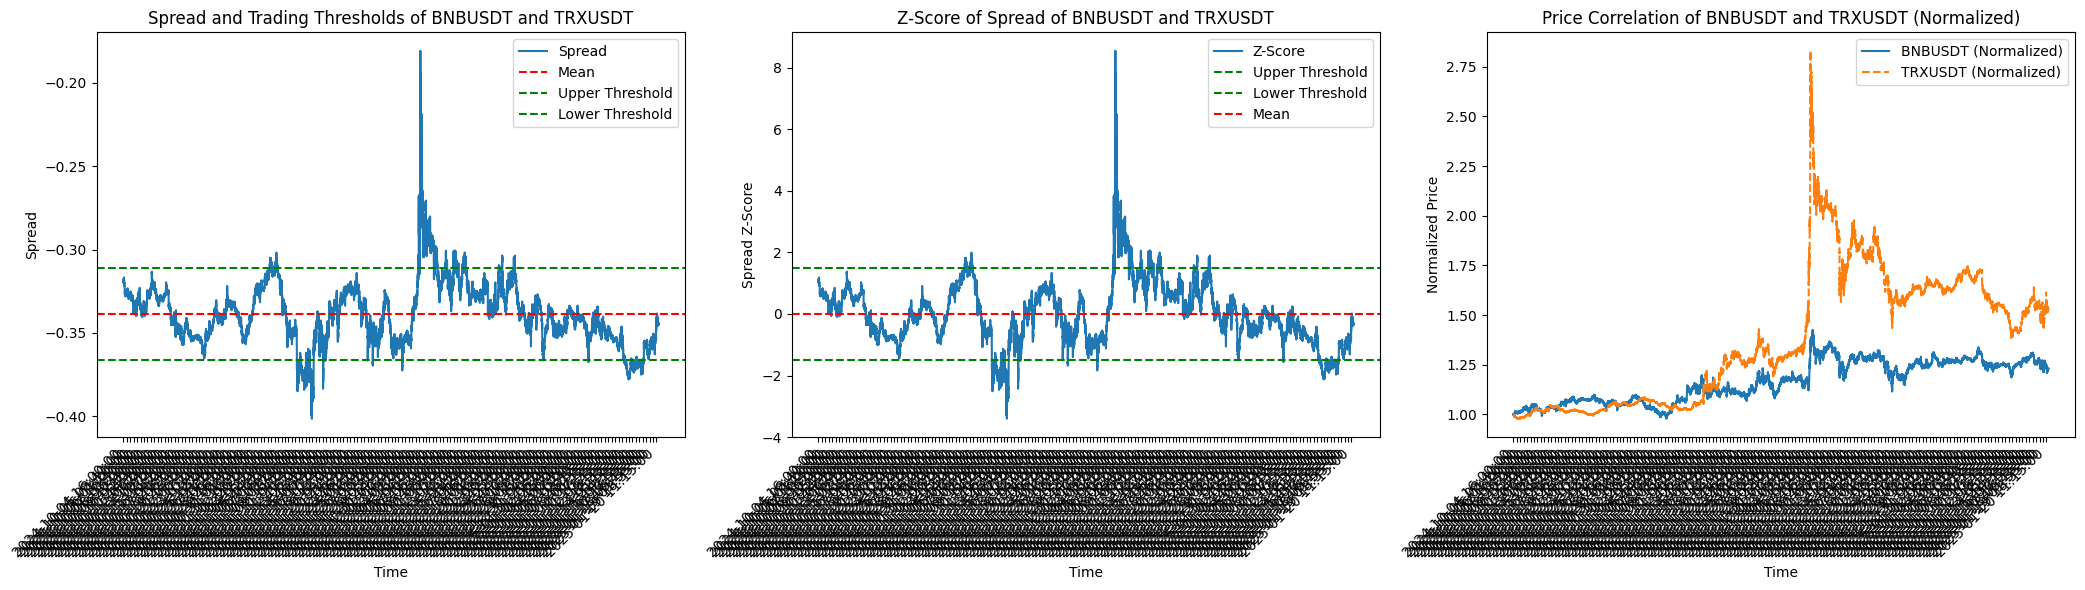

In [19]:
spread_stationary = True
series_cointegrated = True
correlation = 0.8

print('*****Stationary spread, cointegration and correlation >= 0.8*****')
filtered = df_results[(df_results['spread_stationary']==spread_stationary)
                      & (df_results['series_cointegrated']==series_cointegrated)
                      & (df_results['correlation']>=correlation)
                      ].copy()
filtered['pair_sorted'] = filtered.apply(lambda x: tuple(sorted([x['seriesX'],
                                                                 x['seriesY']])),
                                                                 axis=1)
filtered = filtered.drop_duplicates(subset=['pair_sorted'])
filtered = filtered.drop(['pair_sorted'], axis=1)
display(filtered)
print(f'Number of pairs: {len(filtered)}')

for i, r in filtered.iterrows():
    ticker_eqt = r['seriesX']
    ticket_cpy = r['seriesY']
    price_pairs = process_pairs_series(ticker_eqt, ticket_cpy, df=df_full)
    spread, correlation, adf_result, coint_result = run_cointegration_test(price_pairs,
                                                                           print_stats=True,
                                                                           plotting=True,
                                                                           std=1.5)

In [20]:
# Save for convenience
filtered.to_csv('filtered_data.csv')

In [21]:
# Save for convenience
df_full.to_csv('df_full.csv')